In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import neighbors, tree, svm, linear_model, model_selection, datasets, metrics

In [3]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
## classification problem
wine['target']
x = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
y = pd.DataFrame(data=wine['target'], columns=['target'])
df = pd.concat((x,y), axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<AxesSubplot:>

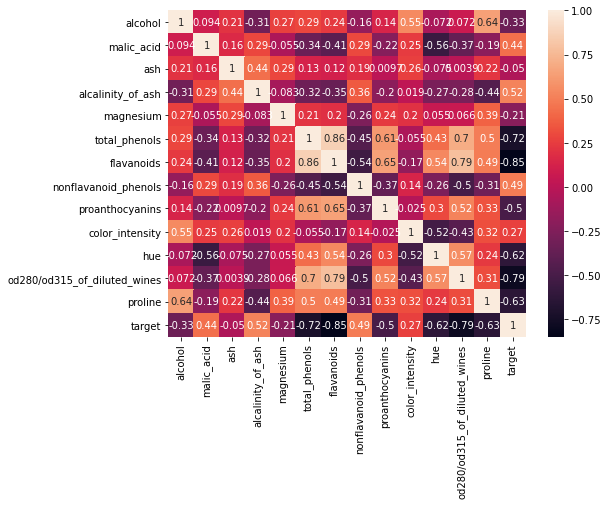

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=2)

# First Set

In [6]:
reg = tree.DecisionTreeClassifier()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.9444444444444444
[[16  2  0]
 [ 0  9  0]
 [ 0  0  9]]


In [7]:
reg = svm.SVC()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.6944444444444444
[[16  0  2]
 [ 0  9  0]
 [ 1  8  0]]


In [8]:
reg = neighbors.KNeighborsClassifier()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.75
[[16  0  2]
 [ 1  7  1]
 [ 1  4  4]]


# Second Set

In [9]:
## feature scaling
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [10]:
reg = tree.DecisionTreeClassifier()
reg.fit(x_train_scaled,y_train)
y_pred = reg.predict(x_test_scaled)


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.9444444444444444
[[16  2  0]
 [ 0  9  0]
 [ 0  0  9]]


In [11]:
reg = svm.SVC()
reg.fit(x_train_scaled,y_train)
y_pred = reg.predict(x_test_scaled)


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.9444444444444444
[[17  1  0]
 [ 0  9  0]
 [ 0  1  8]]


In [12]:
reg = neighbors.KNeighborsClassifier()
reg.fit(x_train_scaled,y_train)
y_pred = reg.predict(x_test_scaled)


print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))


0.9444444444444444
[[18  0  0]
 [ 1  7  1]
 [ 0  0  9]]
